# College Placement Prediction – ML Model Notebook

This notebook trains a machine learning model to predict whether a student will be placed based on academic, skills, and profile features.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:

df = pd.read_csv("../data/college_placement_1000.csv")
df.head()


,student_id,cgpa,internships,projects,certifications,communication_score,aptitude_score,technical_score,domain,skills,placed
0,S1000,7.70,3,4,2,6,6,7,Web Development,"HTML, CSS, JavaScript",1
1,S1001,7.19,1,4,1,7,10,8,Cyber Security,"Linux, Security Tools, Scripting",1
2,S1002,7.82,0,2,2,8,5,8,Cloud Computing,"GCP, Terraform, CI/CD",0
3,S1003,8.52,0,1,0,7,4,6,Data Science,"Python, SQL, Power BI",0
4,S1004,7.11,1,4,0,5,9,5,Web Development,"HTML, CSS, JavaScript",1


In [3]:

df.shape, df.isnull().sum()


((1000, 11),
 student_id             0
 cgpa                   0
 internships            0
 projects               0
 certifications         0
 communication_score    0
 aptitude_score         0
 technical_score        0
 domain                 0
 skills                 0
 placed                 0
 dtype: int64)

In [4]:

le_domain = LabelEncoder()
df['domain'] = le_domain.fit_transform(df['domain'])

le_skills = LabelEncoder()
df['skills'] = le_skills.fit_transform(df['skills'])
df.head()


,student_id,cgpa,internships,projects,certifications,communication_score,aptitude_score,technical_score,domain,skills,placed
0,S1000,7.70,3,4,2,6,6,7,6,10,1
1,S1001,7.19,1,4,1,7,10,8,3,12,1
2,S1002,7.82,0,2,2,8,5,8,2,9,0
3,S1003,8.52,0,1,0,7,4,6,4,21,0
4,S1004,7.11,1,4,0,5,9,5,6,10,1


In [5]:

X = df.drop(["placed", "student_id"], axis=1)
y = df["placed"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((800, 9), (200, 9))

In [6]:

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.535

Confusion Matrix:
 [[66 37]
 [56 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.64      0.59       103
           1       0.53      0.42      0.47        97

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.54      0.53       200



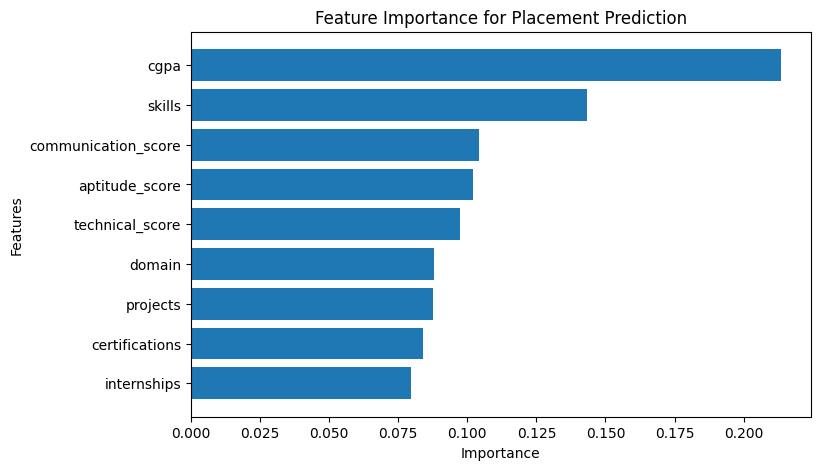

In [8]:

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values()

plt.figure(figsize=(8, 5))
plt.barh(importances.index, importances.values)
plt.title("Feature Importance for Placement Prediction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [9]:

def predict_student(student_dict):
    # student_dict should be a simple dict with values
    st = student_dict.copy()
    
    # Convert to DataFrame
    df_student = pd.DataFrame([st])
    
    # Transform categorical features using fitted encoders
    df_student['domain'] = le_domain.transform(df_student['domain'])
    df_student['skills'] = le_skills.transform(df_student['skills'])
    
    pred = model.predict(df_student)[0]
    prob = model.predict_proba(df_student)[0][1]
    
    return pred, round(prob * 100, 2)

test_student = {
    "cgpa": 7.2,
    "internships": 1,
    "projects": 3,
    "certifications": 2,
    "communication_score": 7,
    "aptitude_score": 6,
    "technical_score": 7,
    "domain": "Data Science",
    "skills": "Python, SQL, Pandas"
}

predict_student(test_student)


(np.int64(0), np.float64(36.33))

In [10]:

def resume_insights(st):
    insights = []

    if st['cgpa'] < 7:
        insights.append("CGPA is a bit low — aim for at least 7.5+.")
    if st['internships'] < 1:
        insights.append("Consider adding at least one internship for practical exposure.")
    if st['projects'] < 3:
        insights.append("Add more domain-related projects to strengthen your profile.")
    if st['certifications'] < 2:
        insights.append("Pursue at least two strong certifications in your target domain.")
    if st['communication_score'] < 7:
        insights.append("Improve communication skills via mock interviews and presentations.")
    if st['technical_score'] < 7:
        insights.append("Strengthen technical skills and core concepts for tests and interviews.")

    return insights

resume_insights(test_student)


[]

In [11]:

import joblib
joblib.dump(model, "placement_model.pkl")


['placement_model.pkl']

In [12]:
df["predicted_placed"] = model.predict(X)
df.to_csv("../data/placement_with_predictions.csv", index=False)

In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# CSV load
df = pd.read_csv("../data/college_placement_1000.csv")

df.head()

,student_id,cgpa,internships,projects,certifications,communication_score,aptitude_score,technical_score,domain,skills,placed
0,S1000,7.70,3,4,2,6,6,7,Web Development,"HTML, CSS, JavaScript",1
1,S1001,7.19,1,4,1,7,10,8,Cyber Security,"Linux, Security Tools, Scripting",1
2,S1002,7.82,0,2,2,8,5,8,Cloud Computing,"GCP, Terraform, CI/CD",0
3,S1003,8.52,0,1,0,7,4,6,Data Science,"Python, SQL, Power BI",0
4,S1004,7.11,1,4,0,5,9,5,Web Development,"HTML, CSS, JavaScript",1


In [20]:
# ==== CLEAN DATA FOR MODEL ====
data = df.copy()

# 1) Unnecessary ID column hata do (ML ke liye use nahi)
if "student_id" in data.columns:
    data = data.drop(columns=["student_id"])

# 2) Saare object (string) columns ko numeric codes me convert karo
obj_cols = data.select_dtypes(include=["object"]).columns
print("Object columns:", list(obj_cols))

for col in obj_cols:
    data[col] = data[col].astype("category").cat.codes

# 3) Target ko int me convert karo (safety)
data["placed"] = data["placed"].astype(int)

# 4) NaN rows hata do (agar kahin hue to)
data = data.dropna()

# 5) X, y define karo
X = data.drop("placed", axis=1)
y = data["placed"]

print("\nDtypes after encoding:\n", X.dtypes)
print("\nClass counts in y:\n", y.value_counts())


Object columns: ['domain', 'skills']

Dtypes after encoding:
 cgpa                   float64
internships              int64
projects                 int64
certifications           int64
communication_score      int64
aptitude_score           int64
technical_score          int64
domain                    int8
skills                    int8
dtype: object

Class counts in y:
 placed
0    509
1    491
Name: count, dtype: int64


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y        # classes balanced rahenge
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train classes:", y_train.value_counts().to_dict())

Train shape: (800, 9) Test shape: (200, 9)
Train classes: {0: 407, 1: 393}


In [22]:
model = LogisticRegression(
    solver="liblinear",   # small datasets ke liye stable
    max_iter=1000
)

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [23]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.535

Confusion Matrix:
 [[62 40]
 [53 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.61      0.57       102
           1       0.53      0.46      0.49        98

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.54      0.53       200



In [24]:
# full data ke liye prediction
data["predicted_placed"] = model.predict(X)

data.to_csv("../data/placement_with_predictions.csv", index=False)
data.head()


,cgpa,internships,projects,certifications,communication_score,aptitude_score,technical_score,domain,skills,placed,predicted_placed
0,7.70,3,4,2,6,6,7,6,10,1,1
1,7.19,1,4,1,7,10,8,3,12,1,1
2,7.82,0,2,2,8,5,8,2,9,0,0
3,8.52,0,1,0,7,4,6,4,21,0,0
4,7.11,1,4,0,5,9,5,6,10,1,0


In [25]:
df.to_csv("../data/placement_with_predictions.csv", index=False)

In [26]:
import joblib
import os

# models folder create (agar nahi hai to)
os.makedirs("../models", exist_ok=True)

# model ko save karo
joblib.dump(model, "../models/placement_model.pkl")

print("Model saved as ../models/placement_model.pkl")


Model saved as ../models/placement_model.pkl
